In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import pandas as pd
from sklearn import metrics

In [2]:
def median(data):
    data.sort()
    half = len(data) // 2
    medianvalue = (data[half] + data[~half])/2
    return medianvalue

In [3]:
#load RF model
with open('./EAGLE.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

In [23]:
#read data
data = pd.read_csv('./testdata.txt')

In [24]:
print(data)

     Unnamed: 0   fexsitu       magi       magr     massallar   colorgr  \
0             0  0.396902 -23.329056 -22.937122  3.946171e+11  0.820615   
1             1  0.468924 -22.776563 -22.402510  1.922848e+11  0.786174   
2             2  0.085276 -21.901702 -21.520415  9.361099e+10  0.802923   
3             3  0.074194 -21.868367 -21.486734  8.988153e+10  0.804294   
4             4  0.049174 -21.846924 -21.455630  9.516043e+10  0.821823   
..          ...       ...        ...        ...           ...       ...   
438         438  0.042950 -20.465634 -20.099879  2.159946e+10  0.769789   
439         439  0.013105 -21.028811 -20.758507  2.259394e+10  0.497329   
440         440  0.038104 -20.755253 -20.402363  2.743510e+10  0.730217   
441         441  0.012897 -20.965019 -20.680467  2.296580e+10  0.501061   
442         442  0.155861 -21.190057 -20.816194  4.660706e+10  0.787329   

           r90       r50       C2D  finnerhalo  fouterhalo        h4  \
0    19.221270  4.517223  3

In [25]:
strfeature = ['magr','colorgr','r90','r50','C2D','fouterhalo',
              'grad_1','grad_3','color_grad_1','color_grad_3']

In [26]:
X_test = data[strfeature]
y_test = data['fexsitu']

In [27]:
#use model to predict fexsitu
random_forest_predict=rf_loaded.predict(X_test)

#if you obtain fexsitu from simulation, you can test the predicted performance.
random_forest_error=random_forest_predict-y_test
arrayrandom_forest_error = np.array(random_forest_error)
medianerror = median(arrayrandom_forest_error)
sortarrayrandom_forest_error = np.sort(arrayrandom_forest_error)
stderror = np.std(arrayrandom_forest_error)
random_forest_R2=np.array([metrics.r2_score(y_test,random_forest_predict)])
print(random_forest_R2)
print(random_forest_predict)

[0.59105411]
[0.5258986  0.5088113  0.22849479 0.17396909 0.14757746 0.38627248
 0.10785245 0.26559083 0.13321435 0.11506316 0.10260756 0.09429876
 0.0908988  0.08699558 0.23359919 0.05056563 0.10429496 0.10471764
 0.52965965 0.20961875 0.10417635 0.1801081  0.09966222 0.07500159
 0.175604   0.32480943 0.08943303 0.08900674 0.09489661 0.07854871
 0.29783586 0.4427307  0.25796686 0.16298313 0.09549163 0.13310962
 0.0998813  0.07330814 0.07304279 0.08912166 0.0819191  0.65437621
 0.36790478 0.37886367 0.36396856 0.06696892 0.08254107 0.13511181
 0.10990042 0.09166257 0.09449162 0.10367204 0.07412425 0.56508641
 0.4504429  0.51949053 0.43559432 0.23610109 0.52936463 0.56939443
 0.37433109 0.1249403  0.08766122 0.0957507  0.17398413 0.32989076
 0.17672546 0.2543174  0.27524296 0.13203034 0.14331204 0.07961053
 0.05164744 0.66292502 0.17797172 0.17591053 0.51019914 0.08006281
 0.18755465 0.13295413 0.35125478 0.20004897 0.08873947 0.30141298
 0.59012063 0.6001877  0.16674139 0.08407439 0.07

Text(0, 0.5, 'Predicted')

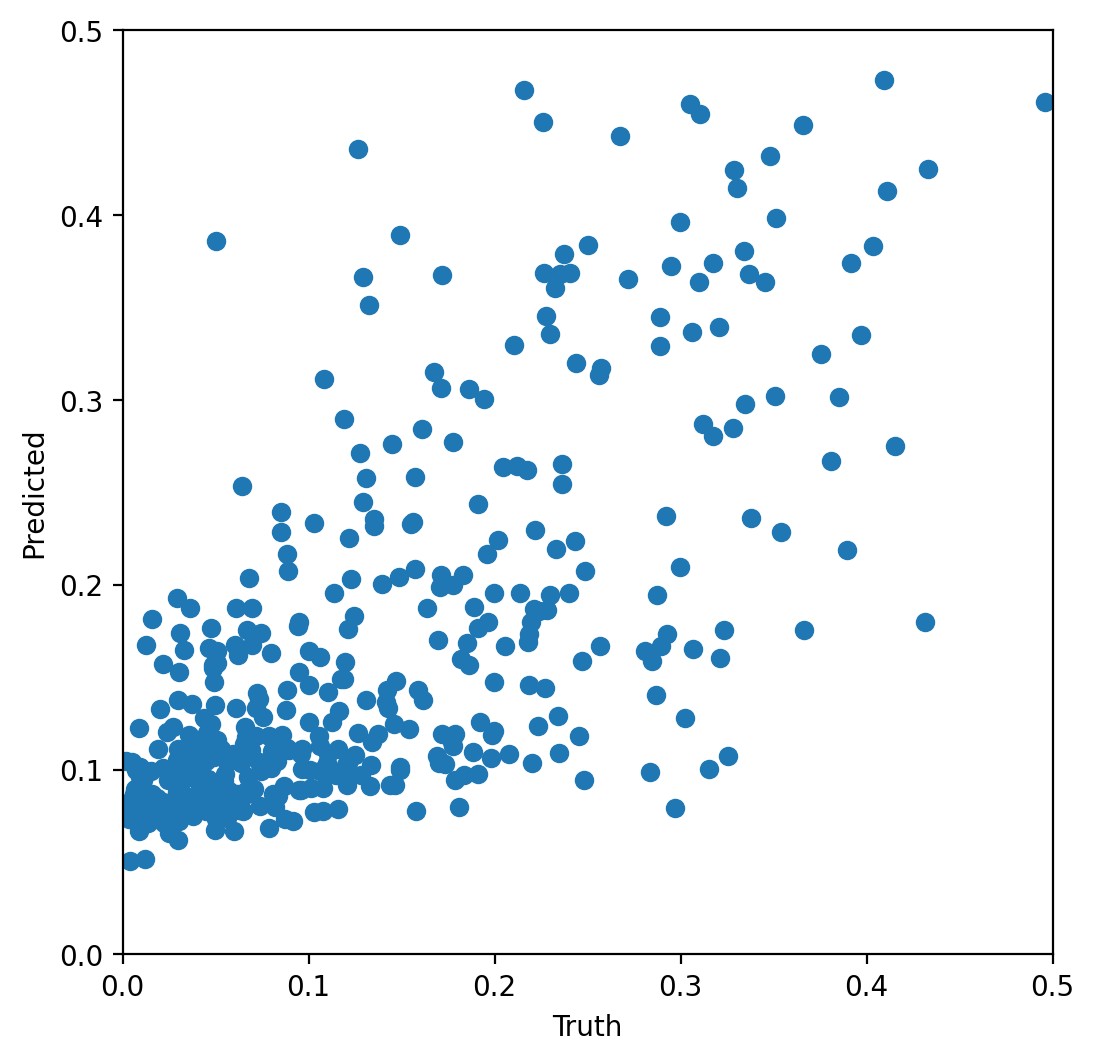

In [28]:
plt.figure(dpi=200,figsize=(6,6))
plt.scatter(y_test,random_forest_predict)
plt.xlim([0,0.5])
plt.ylim([0,0.5])
plt.xlabel('Truth')
plt.ylabel('Predicted')